# Observations
   ### 1. There are a disproportionate number of drivers in urban areas. At first this sounds intuitive-  that there are more people in urban areas and significantly more rides being taken (nearly 69% of overall rides), so, it is only natural that more drivers will sign up where they have the opportunity to work more. In actuality though, the average driver in urban areas drives LESS than the average driver in both suburban and rural areas (urban = 0.7 rides/driver, suburban = 1.3 rides/driver, and rural = 1.6 rides/driver). 
   ### 2. Expanding on the previous point, rides in urban areas produce fares that are, on average, ten dollars less than rides in rural areas (~25 dollars in urban areas vs ~35 dollars in rural areas). This means that drivers in urban areas will give less rides and earn less money per ride than their counterparts in rural areas. In total, rural drivers are producing over three times more revenue than urban drivers. If someone is looking to drive for Pyber I will be recommending that they get out of the city in order to maximize profits.
   ### 3. More key data is needed to interpret the demand for Pyber's ride sharing service. Two key data points that would be helpful in understanding the overall success of this early start up are the amount of time drivers are spending "on the clock" and the average wait time for for riders from the time they request their ride via the app to the time they are picked up by the driver. The first data point would give an information on whether there are too many drivers or not enough. On paper it seems like there are too many drivers as most drivers who were signed up for the app only drove about one time the entire year. However, for a start up that is anticipating growth having an early surplus of drivers isn't necessarily a bad thing. It gets bad if all of these drivers are actively working and waiting for rides and they each only got one ride for the whole year. The second data point would provide information on customer service. If the average wait time to get picked up is high then not enough of the registered drivers are actively working. These two data points would provide insightful information about the funcitonality of Pyber for both drivers and riders alike.
   ### 4. A few tips for the future: One, encourage drivers to drive a little out of the city to the suburbs or rural areasin order to pick up rides at a more frequent rate and to make more money per ride. Two, consider discount pricing, surge pricing and grouped rides in the cities. It isn't a good sign that city drivers are working less than their counterparts from other areas. To incentivize more active users of Pyber consider implementing discount pricing at times and grouped rides like many ride sharing companies have done. Likewise, during busier times when drivers are at a premium conisder using surge pricing to maximize profits. Lastly, and most importantly, find ways to market and compete with other ride sharing companies. The number of rides given in 2018 isn't sustainable. Aggressive marketing and finding a niche in the ride sharing market will be essential for Pyber's long-term success. 


In [2]:
%matplotlib inline
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read in data
city_file = "city_data.csv"
ride_file = "ride_data.csv"

city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

# create dataframe that merges the two datasets
merged_df = pd.merge(city_df, ride_df, on = "city")
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
# identify the unique cities without duplicate data
unique_cities = merged_df.loc[:,["city", "type", "driver_count"]]
unique_cities = unique_cities.drop_duplicates()

# store the average fare by city and the total number of rides for each city using groupby
avg_fare = merged_df.groupby("city").mean()["fare"]
total_rides = merged_df.groupby("city").count()["ride_id"]

# create dataframe that includes all pertinent data
master_df = unique_cities.set_index("city")
master_df ["Total Rides"] = total_rides
master_df ["Average Fare"] = avg_fare

# rename columns and index
master_df = master_df.rename(columns={"type": "Community Type",
                                     "driver_count": "Driver Count"})
master_df.index.names = ["City"]

master_df.head()

,Community Type,Driver Count,Total Rides,Average Fare
City,,,,
Richardfort,Urban,38,28,22.373214
Williamsstad,Urban,59,23,24.362174
Port Angela,Urban,67,19,23.836842
Rodneyfort,Urban,34,23,28.616957
West Robert,Urban,39,31,25.123871


## Bubble Plot of Ride Sharing Data

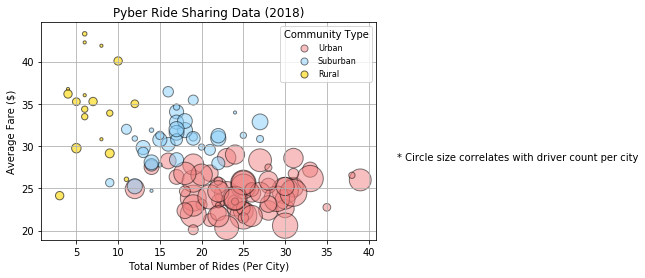

In [9]:
# create unique dataframes for each community type
urban_df = pd.DataFrame(master_df.loc[master_df["Community Type"]=="Urban", :])
suburban_df = pd.DataFrame(master_df.loc[master_df["Community Type"]=="Suburban", :])
rural_df = pd.DataFrame(master_df.loc[master_df["Community Type"]=="Rural", :])

# plot each of the individual dataframes on a scatter plot
# total rides on x axis, avg fare on y axis, size of marker dependent on driver count
# format for color and transparancy. Set labels
plt.scatter(urban_df["Total Rides"], urban_df["Average Fare"], facecolors = "lightcoral", edgecolors = "black", s = urban_df["Driver Count"]*10, alpha = 0.5,  label = "Urban")
plt.scatter(suburban_df["Total Rides"], suburban_df["Average Fare"], facecolors = "lightskyblue", edgecolors = "black", s = suburban_df["Driver Count"]*10, alpha = 0.5, label= "Suburban")
plt.scatter(rural_df["Total Rides"], rural_df["Average Fare"], facecolors = "gold", edgecolors = "black", s = rural_df["Driver Count"]*10, alpha = 0.6, label = "Rural")

# add title, legend, and labels
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# insert legend in upper right corner, add frame and title
key = plt.legend( frameon = True, loc = "upper right", fontsize = 8, title = "Community Type")

# format bubbles in legend to be a uniform size
key.legendHandles[0]._sizes = [50]
key.legendHandles[1]._sizes = [50]
key.legendHandles[2]._sizes = [50]

# add note and plot grid
note = "* Circle size correlates with driver count per city"
plt.gcf().text(0.95, 0.4, note)
plt.grid()
plt.savefig("pyber_bubble.png", bbox_inches = "tight")

## Total Fares by City Type

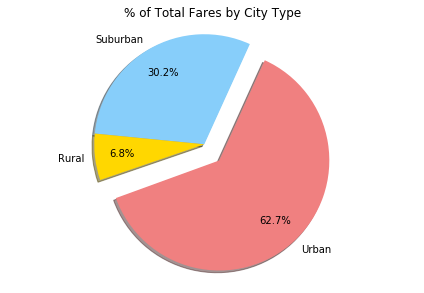

In [6]:
# compute percentages of total fares using unique city dataframes
urban_fare = urban_df["Average Fare"].mean() * urban_df["Total Rides"].sum() / merged_df["fare"].sum() 
suburban_fare = suburban_df["Average Fare"].mean() * suburban_df["Total Rides"].sum() / merged_df["fare"].sum()
rural_fare = rural_df["Average Fare"].mean() * rural_df["Total Rides"].sum() / merged_df["fare"].sum()

# define variables to make pie chart
fares_pct = [urban_fare, suburban_fare, rural_fare]
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
fare_explode = (0.2, 0, 0)

# create pie chart, adjust percentage location and start angle for legibility
plt.pie(fares_pct, explode = fare_explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle= 200, pctdistance=0.75)

# format and add title
plt.axis("equal") 
plt.tight_layout()
plt.title("% of Total Fares by City Type")

plt.savefig("fare_pie.png", bbox_inches = "tight")

## Total Rides by City Type

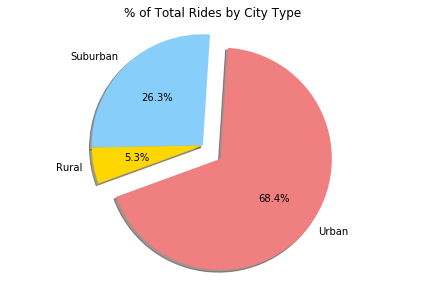

In [7]:
# compute percentages of total rides using unique city type dataframes
urban_pct = urban_df["Total Rides"].sum() / merged_df['ride_id'].count()
suburban_pct = suburban_df["Total Rides"].sum() / merged_df['ride_id'].count()
rural_pct = rural_df["Total Rides"].sum() / merged_df['ride_id'].count()

# define variables to make pie chart
content = [urban_pct, suburban_pct, rural_pct]
city_explode = (0.2, 0, 0)

# create pie chart using variables, adjust percentage location and start angle for legibility
plt.pie(content, explode = city_explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle= 200)

# format and add title
plt.axis("equal")
plt.tight_layout()
plt.title("% of Total Rides by City Type")
plt.savefig("ride_pie.png", bbox_inches = "tight")

## Total Drivers by City Type

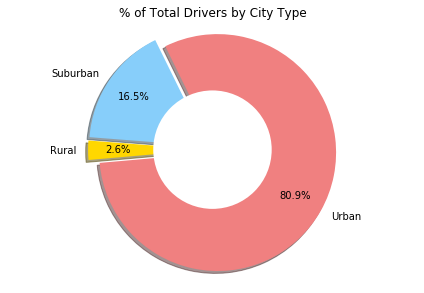

In [8]:
# compute percentages of total drivers using unique city type dataframes
urban_drivers = urban_df["Driver Count"].sum() / master_df["Driver Count"].sum()
suburban_drivers = suburban_df["Driver Count"].sum() / master_df["Driver Count"].sum()
rural_drivers = rural_df["Driver Count"].sum() / master_df["Driver Count"].sum()

# define variables to make pie chart
driver_content = [urban_drivers, suburban_drivers, rural_drivers]
driver_explode = (0.05, 0.05, 0.05)

# create pie chart using variables, adjust percentage location and start angle for legibility
plt.pie(driver_content, explode = driver_explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow=True, startangle= 185, pctdistance=0.75)

# create white hole in center of pie chart for unique look
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# format and add title
plt.axis("equal") 
plt.tight_layout()
plt.title("% of Total Drivers by City Type")
plt.savefig("driver_pie.png", bbox_inches = "tight")

## Average Number of Rides per Driver by City Type

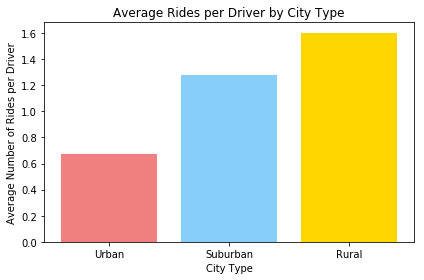

In [8]:
# compute average number of rides for drivers from each city type
urban_per = urban_df["Total Rides"].sum() / urban_df["Driver Count"].sum()
suburban_per = suburban_df["Total Rides"].sum() / suburban_df["Driver Count"].sum()
rural_per = rural_df["Total Rides"].sum() / rural_df["Driver Count"].sum()

# define variables to make bar graph
bar_inputs = [urban_per, suburban_per, rural_per]
x_axis = np.arange(len(bar_inputs))

# create bar graph
plt.bar(x_axis, bar_inputs, color = colors, alpha = 1, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)

# format, add title and labels
plt.title("Average Rides per Driver by City Type")
plt.xlabel("City Type")
plt.ylabel("Average Number of Rides per Driver")
plt.tight_layout()

## Average Fare Total per Driver by City Type

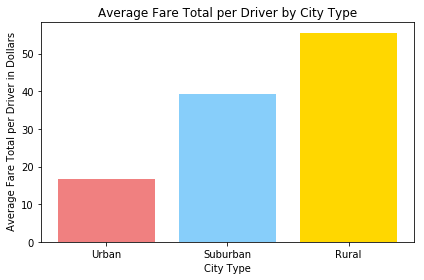

In [9]:
# compute fare total per driver by city type
urban_earn = urban_df["Average Fare"].mean() * urban_df["Total Rides"].sum() / urban_df["Driver Count"].sum()
suburban_earn = suburban_df["Average Fare"].mean() * suburban_df["Total Rides"].sum() / suburban_df["Driver Count"].sum()
rural_earn = rural_df["Average Fare"].mean() * rural_df["Total Rides"].sum() / rural_df["Driver Count"].sum()

# define variables to make bar graph
bar_data = [urban_earn, suburban_earn, rural_earn]
x_axis = np.arange(len(bar_data))

# create bar graph
plt.bar(x_axis, bar_data, color = colors, alpha = 1, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)

# format, add title and labels
plt.title("Average Fare Total per Driver by City Type")
plt.xlabel("City Type")
plt.ylabel(" Average Fare Total per Driver in Dollars")
plt.tight_layout()

## Average Fare per Ride by City Type

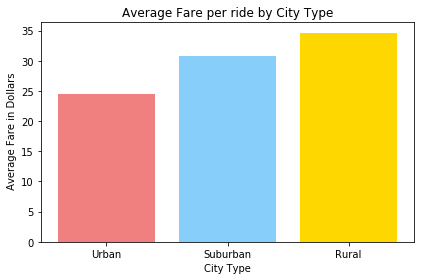

In [10]:
# compute average fare for each city type
urban_ride_avg = urban_df["Average Fare"].mean()
suburban_ride_avg = suburban_df["Average Fare"].mean()
rural_ride_avg = rural_df["Average Fare"].mean()

# define variables to be used for pie chart
bar_info = [urban_ride_avg, suburban_ride_avg, rural_ride_avg]
x_axis = np.arange(len(bar_info))

# create pie chart, add tick locations
plt.bar(x_axis, bar_info, color = colors, alpha = 1, align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)

# format, add title and labels
plt.title("Average Fare per ride by City Type")
plt.xlabel("City Type")
plt.ylabel(" Average Fare in Dollars")
plt.tight_layout()